In [1]:
pip install yfinance

[*********************100%***********************]  1 of 1 completed


RMSE: 4.881742239382077
MAE: 3.7421964188696633


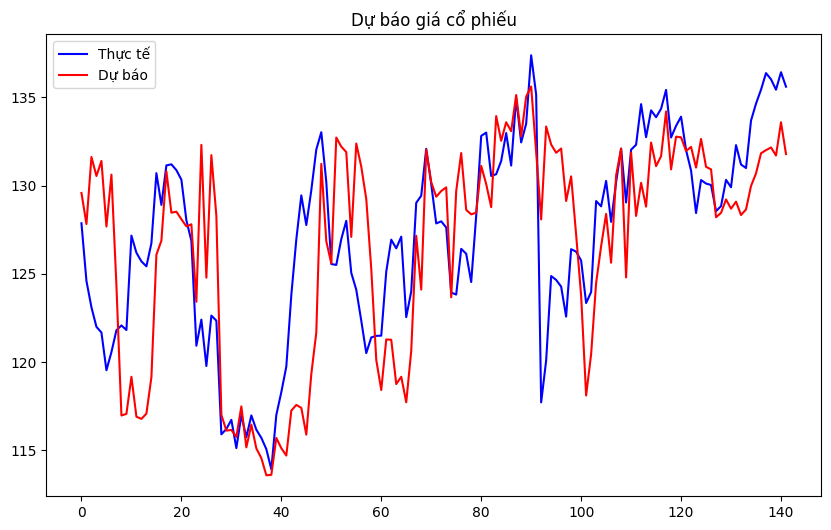

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 1. Thu thập dữ liệu cổ phiếu
def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# 2. Tạo các đặc trưng từ dữ liệu lịch sử giá
def create_features(df):
    df['Return'] = df['Close'].pct_change()  # Tính tỷ suất lợi nhuận hàng ngày
    df['MA10'] = df['Close'].rolling(window=10).mean()  # Trung bình động 10 ngày
    df['MA50'] = df['Close'].rolling(window=50).mean()  # Trung bình động 50 ngày
    df['Volatility'] = df['Close'].rolling(window=10).std()  # Độ biến động trong 10 ngày
    df = df.dropna()
    return df

# 3. Chia tập dữ liệu thành đặc trưng (features) và nhãn (labels)
def prepare_data(df):
    X = df[['Return', 'MA10', 'MA50', 'Volatility']]
    y = df['Close']

    # Chia thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# 4. Xây dựng mô hình XGBoost và huấn luyện
def train_xgboost(X_train, y_train):
    model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
    model.fit(X_train, y_train, verbose=False)
    return model

# 5. Đánh giá và dự báo giá cổ phiếu
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

    # Vẽ biểu đồ giá thực tế và dự báo
    plt.figure(figsize=(10,6))
    plt.plot(y_test.values, label='Thực tế', color='blue')
    plt.plot(y_pred, label='Dự báo', color='red')
    plt.title('Dự báo giá cổ phiếu')
    plt.legend()
    plt.show()

# 6. Chương trình chính
if __name__ == "__main__":
    ticker = 'ALL'  # Mã cổ phiếu
    start_date = '2020-01-01'
    end_date = '2023-01-01'

    # Bước 1: Lấy dữ liệu
    data = get_stock_data(ticker, start_date, end_date)

    # Bước 2: Tạo các đặc trưng từ dữ liệu lịch sử
    data = create_features(data)

    # Bước 3: Chuẩn bị dữ liệu
    X_train, X_test, y_train, y_test = prepare_data(data)

    # Bước 4: Xây dựng và huấn luyện mô hình
    model = train_xgboost(X_train, y_train)

    # Bước 5: Đánh giá và dự báo
    evaluate_model(model, X_test, y_test)


In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Return,MA10,MA50,Volatility
Date,,,,,,,,,,
2020-03-13,89.459999,93.059998,83.099998,92.769997,82.634171,3606000,0.107040,101.618999,114.9122,10.213575
2020-03-16,78.000000,90.540001,78.000000,84.980003,75.695297,3607500,-0.083971,98.850000,114.3554,10.629686
2020-03-17,87.160004,90.650002,85.269997,87.940002,78.331886,2917900,0.034832,96.724001,113.8576,10.454233
2020-03-18,81.639999,83.750000,64.129997,75.550003,67.295593,3617400,-0.140892,92.828001,113.1054,10.348522
2020-03-19,74.129997,78.519997,70.730003,74.690002,66.529549,2475800,-0.011383,89.451001,112.3554,10.189392
